# Problem set 3 (90 pts)

## Important note: the template for your solution filename is Name_Surname_PS3.ipynb

### The correct answer to the bonus question can be used as an additional reason to increase the final grade in the border case

## Problem 1 (25 pts)

- (5 pts) Prove that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$ if $\mathrm{vec}(X)$ is a columnwise reshape of a matrix into a long vector. What does it change if the reshape is rowwise? 

**Note:** To make a columnwise reshape in Python one should use ```np.reshape(X, order='f')```, where the string ```'f'``` stands for the Fortran ordering. 

- (2 pts) What is the complexity of a naive computation of $(A \otimes B) x$? Show how it can be reduced.

- (3 pts) Let matrices $A$ and $B$ have eigendecompositions $A = S_A\Lambda_A S_A^{-1}$ and $B = S_B\Lambda_B S^{-1}_B$. Find eigenvectors and eigenvalues of the matrix $A\otimes I + I \otimes B$, where dimension of $I$ coincides with the dimension of $A$ and $B$.


- (10 pts) Let $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Estimate analytically the number of iterations required  to solve linear system with $A$ with the relative accuracy $10^{-4}$ using
    - Richardson iteration with the optimal choice of parameter (use $2$-norm)
    - Chebyshev iteration (use $2$-norm)
    - Conjugate gradient method (use $A$-norm).
    
- (5 pts) Provide numerical confirmation of your estimate from theoretical point of view

### 1)

Let's check, that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$ holds for columnwise reshape.

Let's consider $k$-th column of $AXB$

$AXb_k=A(\sum_{i = 1}^m b_{ik})=\sum_{i=1}^nb_{ik}Ax{i}=(b_{1,k}A...b_{m,k}A)\begin{pmatrix} x_1 \\ \vdots \\ x_m \end{pmatrix}$

It is mean that:
$\mathrm{vec}(AXB)=\begin{pmatrix} AXb_1 \\ ... \\ AXb_n \end{pmatrix} = 
 \begin{pmatrix} b_1^T \otimes A \\ ... \\ b_n^T \otimes A\end{pmatrix} \mathrm{vec}(X) = (B^T \otimes A) \mathrm{vec}(X)$

Similarly, let's look on row-wise approach:

 $A = \begin{pmatrix} a_1 \\ \vdots \\ a_n \end{pmatrix} , X = \begin{pmatrix} x_1 \\ \vdots \\ x_n \end{pmatrix}$

$a_k X B =  \sum_{i=1}^n a_{ik} x_i B =  \sum_{i=1}^n a_{ik} B^T x_i  = \begin{pmatrix} a_{1k} B^T & ... & a_{nk} B^T \end{pmatrix} \begin{pmatrix} x_1 \\ \vdots \\ x_n \end{pmatrix} = (a_k \otimes B^T) \mathrm{vec}(X)$

$\mathrm{vec}(AXB) = \begin{pmatrix} a_1XB &  \ldots &  a_nXB \end{pmatrix} = 
 \begin{pmatrix} a_1 \otimes B^T & \ldots & a_n \otimes B^T\end{pmatrix} \mathrm{vec}(X) = (A \otimes B^T ) \mathrm{vec}(X)$
 

### 2)

Well, naive approach takes $\mathcal{O}(n^4)$ to compute Kroneker product, $\mathcal{O}(n^6)$ for matrix by vector product.

To reduce complexity, we should reshape $x$ to $X \in \mathbb{R}^{n\times n}$ matrix, complexity of reshaping is $\mathcal{O}(n^2)$.
 
 $(A\otimes B)x=(A\otimes B)vec(X) \iff x$ is long vector.
 Thus, we could apply 1) formula:

$$
(A\otimes B)\mathrm{vec}(X) = \mathrm{vec}(BXA^\top)
$$

$
BXA^\top \text{product will take } \mathcal{O}(n^3)\text{, reshaping to } \mathrm{vec(\ldots)} - \mathcal{O}(n^2).
$

So, in total, it is $\mathcal{O}(n^3)$, which is way more efficient.


### 3)

Applying separate EVDs and using auxillary formulas:

$(A\otimes B)(C\otimes D)=AC\otimes BD$

 $(A\otimes B)^{-1}=(A^{-1}\otimes B^{-1})$

$A \otimes I+I \otimes B = S_{A} \Lambda_{A} S_{A}^{-1} \otimes I+I_{B} \otimes S_{B} \Lambda_{B} S_{B}^{-1}$

$
= S_{A} \Lambda_{A} S_{A}^I+S_{A} S_{A}^{-1} \otimes S_{B} \Lambda_{B} S_{B}^{-1}
$

$
=\left(S_{A} \otimes I\right)\left(\Lambda_{A} S_{A}^{-1} \otimes I+S_{A}^{-1} \otimes S_{B} \Lambda_{B} S_{B}^{-1}\right)
$

$
=\left(S_{A} \otimes I\right)\left(\Lambda_{A} \otimes S_{B} S_{0}^{-1}+I \otimes S_{B} \Lambda_{B} S_{B}^{-1}\right)\left(S_{A}^{-1} \otimes I\right)
$

$
=\left(S_{A} \otimes I\right)\left(I \otimes S_{B}\right)\left(\Lambda_{A} \otimes S_{B}^{-1}+I \otimes \Lambda_{B} S_{B}^{-1}\right)\left(S_{A}^{-1} \otimes I\right)
$

$
= \left(S_{A} \otimes I\right)\left(I \otimes S_{B}\right)\left(\Lambda_{A} \otimes I+I \otimes \Lambda_{B}\right)\left(I \otimes S_{B}^{-1}\right)\left(S_{A}^{-1} \otimes I\right)
$

Thus, we found EVD for $A \otimes I+I \otimes B$, where multiples:

1. $\left(S_{A} \otimes I\right)\left(I \otimes S_{B}\right)$ corresponds to left eigenvectors 

2. $\left( \Lambda_{A} \otimes I+I \otimes \Lambda_{B}\right)$ contains eigenvalues

3. $\left(I \otimes S_{B}^{-1}\right)\left(S_{A}^{-1} \otimes I\right)$ corresponds to right eigenvectors 



### 4)

 **Richardson**

Relative error using 2-norm:
$e_{k} = \frac{\|x_k - x_*\|_2}{\|x_*\|_2} \leq \|I - \tau A\|_2^k = \sigma^k_{max} (I - \tau A) = 
 \sigma^k_{max} \left(I - \frac{2}{\lambda_{\min} + \lambda_{\max}} A \right) 
 = \left(1 - \frac{2 \lambda_{min}}{\lambda_{\min} + \lambda_{\max}}\right)^k 
 \approx \left( 1 - \frac{2}{10^6}\right)^k$

As accuracy is less than $10^{-4}$, so

$\left( 1 - \frac{2}{10^6}\right)^k \leq 10^{-4}$


$\Rightarrow k \geq \frac{-4 \ln 10}{\ln \left( 1 - \frac{2}{10^6} \right)} \approx {4,6 \cdot 10^{6}}$

**Chebyshev**

we can describe convergence as
$
   e_{k+1} \leq C q^k$, where $q = \frac{\sqrt{\kappa(A)}-1}{\sqrt{\kappa(A)}+1},
$

so, we have $q^{k} = \left( \frac{\sqrt{\kappa(A)}-1}{\sqrt{\kappa(A)}+1} \right)^k \leq 10^{-4}$

$\Rightarrow k[ \ln (\sqrt{\kappa(A)} - 1) -  \ln (\sqrt{\kappa (A)} + 1)] \leq -4 \ln 10$

$
\Rightarrow k \leq \frac{-4 \ln 10}{\ln \left( \frac{\sqrt{\kappa(A)} - 1}{\sqrt{\kappa(A)} +1}\right)} \approx 4,6 \cdot 10^3$


**Conjugate gradient method**

By fact for $A$ with $m$ various eigenvalues, \textit{CG} converges in $m$ iterations. Hence, in our case we will witness convergence after $1001$ iterations.

## Problem 2 (65 pts)
### On the performance of conjugate gradient method for BTTB matrices.

You are given 2D image (QR-code) and convolution operator $T$. The application of $T$ results in smoothing of the image. In exact arithmetic, the proposed $T$ is non-singular. However, it becomes rather ill-conditioned with increasing $N$ in finite precision arithmetic. In this task you need to study how the conjugate gradient method performs in this case.

The original passcode is given below:

(-0.5, 329.5, 329.5, -0.5)

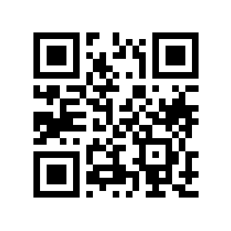

In [113]:
import matplotlib.pyplot as plt
x = plt.imread('qrcode.gif')[:,:,0]
N = x.shape[0]
plt.imshow(x, cmap="gray")
plt.axis("off")

Blurring can be performed by convolving $n\times n$ QR-code with the following filter:

$$T_{i_1j_1,i_2j_2} = T_{i_1-j_1,i_2-j_2} = \frac{\alpha}{\pi}e^{-\alpha[(i_1-j_1)^2 + (i_2-j_2)^2]}, \quad i_1,j_1,i_2,j_2 = 1 \ldots n, \quad 1 > \alpha > 0.$$

You know from lectures that this convolution can be viewed as a matrix-vector multiplication of some BTTB matrix $T$ of size $n^2 \times n^2$.

## Task 1 (15 pts) 

- Write function `T_matvec()` that performs multiplication of $T$ by a given vector $x$ efficiently. Remember about FFT.
- Use `scipy.sparse.linalg.LinearOperator` to create an object that has attribute `.dot()` (this object will be further used in the iterative process). Note that `.dot()` input and output must be 1D vectors, so do not forget to use reshape.

In [114]:
import numpy as np

In [115]:
def get_toeplitz(x, aplha, N):
    axis = np.hstack([np.arange(N), np.arange(1 - N, 0)])
    grid = np.meshgrid(axis, axis)

#     print(grid)
    
    N_DIM = 2 * N - 1
    
    T = np.zeros([N_DIM, N_DIM])
    
    for i in range(N_DIM):
        for j in range(N_DIM):
            T[i,j] = alpha / np.pi * np.exp(-alpha * ((grid[0][i,j]**2 + grid[1][i,j]**2)))
    
    return T

In [116]:
def T_matvec(x, alpha, N):
    
    tmp = x.reshape(int(np.sqrt(x.shape[0])), -1)
    padded_x = np.pad(tmp, (N-1, N-1), constant_values=0)[N-1:, N-1:]
    
    padded_x = np.fft.fft2(padded_x)

    T = np.fft.fft2(get_toeplitz(x, alpha, N=N))
    
    return np.fft.ifft2(padded_x * T)[:N,:N].reshape(1, -1)[0]

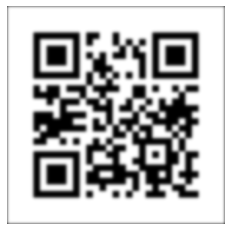

In [117]:
alpha=0.1

x_noised = T_matvec(x.reshape(-1), alpha=alpha, N=N).reshape(x.shape[0], -1)

plt.imshow(np.abs(x_noised), cmap='gray')
plt.axis('off')
plt.show()

**Remark.** The obtained matrix $T$ is positive definite (at least in the exact arithmetic), hence the conjugate gradient method can be applied to solve with $T$.

**Bonus question: Prove the remark above.**

## Task 2 (10 pts) 
- For $\alpha \in \{ 0.1, 0.01,0.001\}$ compute $y=Tx$ and deconvolve $x$ using `scipy.sparse.linalg.cg` with $tol \in \{10^{-3}, 10^{-4}, 10^{-5}, 10^{-6}, 10^{-7}\}$. For each pair $\alpha$, $tol$ write out `num_iters` and relative error $e = \frac{\|x - x^*\|_2}{\|x\|_2}$ .
- Comment on the results: 

    1) why the relative error does not converge to zero? 
    
    2) why the relative error converges to different values for different $\alpha$?

In [118]:
import scipy.sparse.linalg as spla

In [119]:
N = x.shape[0]

In [120]:
x_star = ~x.reshape(-1)

def error_inc(arg):
    global errors, x_star
    errors.append(np.linalg.norm(arg - x_star, ord=2) / np.linalg.norm(x_star, ord=2))

In [73]:
alphas = [1e-1, 1e-2, 1e-3]
tols = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7]

errors=[]
report = []

for alpha in alphas:
    for tol in tols: 
        T = spla.LinearOperator((N**2, N**2), matvec = lambda x : T_matvec(x, alpha, N=N))
        
        y = T.dot(x_star)
        sol, info = spla.cg(T, y, tol=tol, callback=error_inc)

        r = (alpha, tol, errors, sol, info)
        report.append(r)
        print(alpha, tol, 'done')

0.1 0.001 done


In [74]:
for r in report:
    print(f'alpha: {r[0]:.3f}, tol: {r[1]:.7f}, num_iters: {len(r[2])}, err: {r[2][-1]:.5f}')

alpha: 0.100, tol: 0.0010000, num_iters: 16, err: 0.18597


Floating point numbers might have influence the convergence, as there are tolerance vals, for those it diverges.
It converges to different values for different alpha's because of different condition numbers of Toeplitz's.

In all further tasks fix $\alpha = 0.01$. Compute $y = Tx$, and add vector with Gaussian noise from $\mathcal{N}(0, 1)$ to $y$ and get the final right-hand side $\hat{y}$.

## Task 3 (10 pts)
- Try to deconvolve $\hat{y}$ with matrix $T$ using $tol=10^{-5}$ in CG. Explain, why CG does not converge.
- Suggest how CG can still be used to recover $x$. What are drawbacks of the suggested approach?

In [75]:
alpha = .01
tol = 1e-5

In [87]:
x_normed = x / 255
errors=[]

T = spla.LinearOperator((N**2, N**2), matvec = lambda x : T_matvec(x, alpha=0.1, N=N))
y = T.dot(x_normed.reshape(-1)) + np.random.normal(0, 1)

sol, info = spla.cg(T, y, tol=tol, maxiter=15, callback=error_inc)

if info == 0.:
    print(f"Converged with {errors[-1]:.5f}")
else:
    print(f'Diverged with = {errors[-1]:.5f}')

Diverged with = 1.00220


We added white noise to x and now it doesnt fit original solution. One of modifications is to use regularisation. But, unfortunately, error will rise since approximate estimate of $x$ goes farther from original $x$.

## Task 4 (10 pts)

- Implement Tikhonov regularization, i.e. deconvolve $\hat{y}$ with the perturbed matrix $T_{\lambda} = T + \lambda^2I$ instead of $T$. Modify `T_matvec()` according to the template below.
- Perform computations for all $\lambda \in \{10, 1, 0.1\}$ and $tol \in \{10^{-3}, 10^{-4}, 10^{-5},10^{-6}, 10^{-7} \}$. For each pair $(\lambda, tol)$ write out `num_iters` and relative error $e = \frac{\|x - x^*\|_2}{\|x\|_2}$. Comment on the results: 
    - Compare robustness of the convergence with task 2. What the observed results indicate?

In [121]:
def T_lmbda_matvec(x, alpha, l_val, N):
    tmp = x.reshape(int(np.sqrt(x.shape[0])), -1)
    padded_x = np.pad(tmp, (N-1, N-1), constant_values=0)[N-1:, N-1:]
    
    padded_x = np.fft.fft2(padded_x)

    T = get_toeplitz(x, alpha, N)
    T += np.eye(len(T), dtype=float) * l_val**2
    T = np.fft.fft2(T)
    
    return np.fft.ifft2(padded_x * T)[:N,:N].reshape(1, -1)

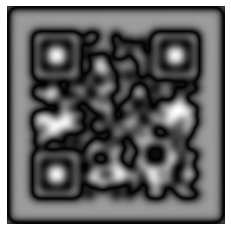

In [125]:
x_noised = T_lmbda_matvec(y, alpha, 0.01, N).reshape(N, -1)

plt.imshow(np.abs(x_noised), cmap='gray')
plt.axis('off')

plt.show()

In [132]:
x_star = ~x.reshape(-1)

def error_inc(arg):
    global errors, x_star
    errors.append(np.linalg.norm(arg - x_star, ord=2) / np.linalg.norm(x_star, ord=2))

In [135]:
lambdas = [1e1, 1e0, 1e-1]
tols = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7]

errors=[]
report = []

for lam in lambdas:
    for tol in tols: 
        T_lam = spla.LinearOperator((N**2, N**2), matvec = lambda x : T_lmbda_matvec(x, alpha, lam, N=N))
        
        y = T_lam.dot(x_star)
        sol, info = spla.cg(T_lam, y, tol=tol, callback=error_inc)

        r = (lam, tol, errors, sol, info)
        report.append(r)
        print(alpha, tol, 'done')

0.1 0.001 done


In [136]:
for r in report:
    print(f'lambda: {r[0]:.1f}, tol: {r[1]:.7f}, num_iters: {len(r[2])}, err: {r[2][-1]:.5f}')

lambda: 10.000, tol: 0.0010000, num_iters: 6, err: 0.81428


From error values we may guess, that regularization help us to make our system well-conditioned

## Task 5 (20 pts)

- Implement BCCB preconditioner for $T_{\lambda}$ based on Strang preconditioner for Toeplitz matrix (hint: build circulants using first columns of Toeplitz matrices on both levels). You know from lectures that circulants can be explicitly inverted using convolution theorem. Implement the corresponding matvec according to the template provided below.
- Check speedup in iterations and runtime that can be gained from the preconditioning for $\alpha = 0.01$, $\lambda = 1$ compared with Task 4. Explain results.

In [ ]:
def C_inv_matvec(x, alpha, lmbda):
    pass

# your code is here